# Model training for maize

In [2]:
from sklearn import linear_model, svm
import pandas as pd
import matplotlib.pyplot as mlp
from datetime import datetime

In [3]:
pd.options.mode.copy_on_write = True
df = pd.read_csv('maize-data.csv')
df

,Year,Rainfall_june_aug,Yeild_hg_per_ha
0,1990,33216.3,15178
1,1991,32804.3,13763
2,1992,30788.3,16758
3,1993,29985.9,16015
4,1994,35361.3,14480
5,1995,32364.7,15946
6,1996,31623.7,17094
7,1997,32356.6,17111
8,1998,31619.9,17969
9,1999,29466.6,17922


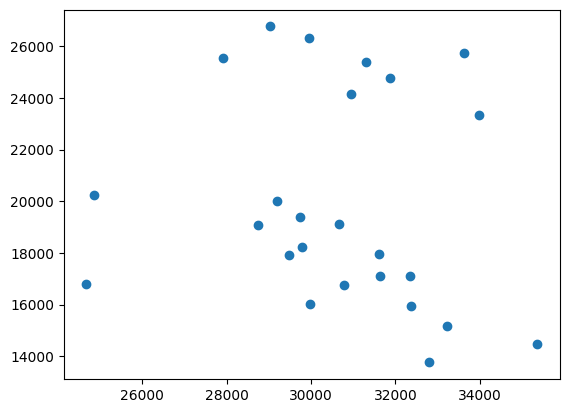

In [4]:
%matplotlib inline
mlp.scatter(df['Rainfall_june_aug'],df['Yeild_hg_per_ha'])

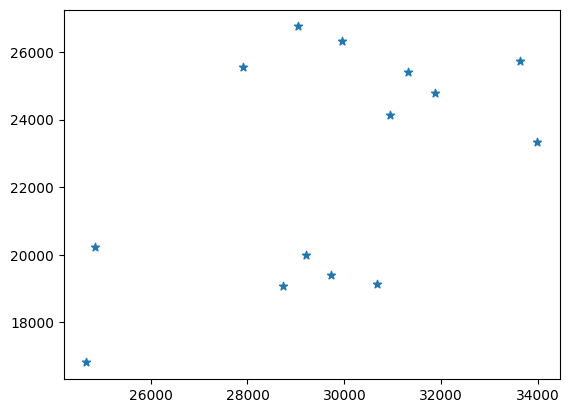

In [9]:
# data after 2000
df2 = df[11:]
%matplotlib inline
mlp.scatter(df2['Rainfall_june_aug'],df2['Yeild_hg_per_ha'], marker='*')

# Linear Regression

## Whole data

In [11]:
model = linear_model.LinearRegression()
df1train , df1test = df[:20] , df[20:]
start = datetime.now()
model.fit(df1train[['Rainfall_june_aug']], df1train.Yeild_hg_per_ha )
print('Time Elapsed', datetime.now()-start)

Time Elapsed 0:00:00.004257


In [16]:
result = model.predict(df1test[['Rainfall_june_aug']]).round(2)
result

array([18166.38, 18936.89, 17822.45, 18716.7 , 18538.41])

In [17]:
df1test['Prediction'] = result
df1test['Accuracy'] = round(100 - abs(((df1test['Prediction'] - df1test['Yeild_hg_per_ha'])/df1test['Yeild_hg_per_ha']) * 100) , 2)

In [18]:
df1test

,Year,Rainfall_june_aug,Yeild_hg_per_ha,Prediction,Accuracy
20,2011,31867.4,24784,18166.38,73.30
21,2012,27905.8,25557,18936.89,74.10
22,2013,33635.7,25726,17822.45,69.28
23,2014,29037.9,26760,18716.70,69.94
24,2015,29954.6,26320,18538.41,70.43


### Average accuracy

In [25]:
df1test['Accuracy'].mean()

71.41

## After 2001

In [21]:
model2 = linear_model.LinearRegression()
df2train , df2test = df2[:10] , df2[10:]
start = datetime.now()
model.fit(df2train[['Rainfall_june_aug']], df2train.Yeild_hg_per_ha )
print('Time Elapsed', datetime.now()-start)

Time Elapsed 0:00:00.003002


In [22]:
result = model.predict(df2test[['Rainfall_june_aug']]).round(2)
result

array([20042.55, 24065.04, 20837.31, 21480.85])

In [23]:
df2test['Prediction'] = result
df2test['Accuracy'] = round(100 - abs(((df1test['Prediction'] - df2test['Yeild_hg_per_ha'])/df2test['Yeild_hg_per_ha']) * 100) , 2)

In [24]:
df2test

,Year,Rainfall_june_aug,Yeild_hg_per_ha,Prediction,Accuracy
21,2012,27905.8,25557,20042.55,74.10
22,2013,33635.7,25726,24065.04,69.28
23,2014,29037.9,26760,20837.31,69.94
24,2015,29954.6,26320,21480.85,70.43


### average accuracy

In [26]:
df2test['Accuracy'].mean()

70.9375

# SVM

## Whole data

In [27]:
svmModel = svm.SVR()
df1train2 , df1test2 = df[:20] , df[20:]
start = datetime.now()
svmModel.fit(df1train2[['Rainfall_june_aug']], df1train2.Yeild_hg_per_ha )
print('Time Elapsed', datetime.now()-start)

Time Elapsed 0:00:00.007002


In [29]:
result = svmModel.predict(df1test2[['Rainfall_june_aug']]).round(2)
df1test2['Prediction'] = result
df1test2["Accuracy"] = round(100 - abs(((df1test2["Yeild_hg_per_ha"]-df1test2['Prediction'])/df1test2["Yeild_hg_per_ha"])*100),2)
df1test2

,Year,Rainfall_june_aug,Yeild_hg_per_ha,Prediction,Accuracy
20,2011,31867.4,24784,17943.65,72.40
21,2012,27905.8,25557,17946.47,70.22
22,2013,33635.7,25726,17942.20,69.74
23,2014,29037.9,26760,17947.01,67.07
24,2015,29954.6,26320,17946.62,68.19


### Average accuracy

In [30]:
df1test2['Accuracy'].mean()

69.524

## After 2001

In [36]:
svmModel2 = svm.SVR()
df2train2 , df2test2 = df2[:10] , df2[10:]
start = datetime.now()
svmModel2.fit(df2train2[['Rainfall_june_aug']], df2train2.Yeild_hg_per_ha )
print('Time Elapsed', datetime.now()-start)

Time Elapsed 0:00:00.003004


In [42]:
result = svmModel2.predict(df2test[['Rainfall_june_aug']]).round(2)
df2test2['Prediction'] = result
df2test2["Accuracy"] = round(100 - abs(((df2test2["Yeild_hg_per_ha"]-df2test2['Prediction'])/df2test2["Yeild_hg_per_ha"])*100),2)
df2test2

,Year,Rainfall_june_aug,Yeild_hg_per_ha,Prediction,Accuracy
21,2012,27905.8,25557,20116.09,78.71
22,2013,33635.7,25726,20120.08,78.21
23,2014,29037.9,26760,20116.05,75.17
24,2015,29954.6,26320,20116.87,76.43


### Average Accuracy

In [43]:
df2test2["Accuracy"].mean()

77.13